In [ ]:
# Home Credit Default Risk Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("C:\\Users\\josep\\Downloads\\Rakamin Tugas\\application_train.csv")
test = pd.read_csv("C:\\Users\\josep\\Downloads\\Rakamin Tugas\\application_test.csv")


In [ ]:
# Data Visualization and Business Insight
def plot_target_distribution():
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x='TARGET')
    plt.title('Distribution of Target Variable')
    plt.show()
    
    # Calculate percentages
    target_counts = train['TARGET'].value_counts(normalize=True) * 100
    print("\nTarget Distribution:")
    print(f"Non-default (0): {target_counts[0]:.2f}%")
    print(f"Default (1): {target_counts[1]:.2f}%")

def analyze_income_type():
    plt.figure(figsize=(12, 6))
    default_rates = train.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)
    default_rates.plot(kind='bar')
    plt.title('Default Rate by Income Type')
    plt.ylabel('Default Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calculate volume
    income_volume = train['NAME_INCOME_TYPE'].value_counts(normalize=True) * 100
    print("\nCustomer Volume by Income Type:")
    print(income_volume)

def analyze_credit_amount():
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TARGET', y='AMT_CREDIT', data=train)
    plt.title('Credit Amount Distribution by Target')
    plt.show()
    
    print("\nCredit Amount Statistics by Target:")
    print(train.groupby('TARGET')['AMT_CREDIT'].describe())

In [16]:

# Machine Learning Implementation
def prepare_model_data(df):
    X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1, errors='ignore')
    y = df['TARGET'] if 'TARGET' in df.columns else None
    return X, y

def train_model():
    # Prepare data
    X, y = prepare_model_data(train)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Identify numerical and categorical columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    
    # Create a preprocessor that scales numerical columns and encodes categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
        ])
    
    # Apply the preprocessor to the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_val_preprocessed = preprocessor.transform(X_val)

    # Train Random Forest model (instead of XGBoost)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_preprocessed, y_train)
    
    # Make predictions
    y_pred = model.predict_proba(X_val_preprocessed)[:, 1]
    
    # Calculate AUC-ROC score
    auc_score = roc_auc_score(y_val, y_pred)
    print(f"\nValidation AUC-ROC Score: {auc_score:.4f}")
    
    return model, preprocessor

def analyze_feature_importance(model, preprocessor, X):
    # Get feature names from the preprocessor
    feature_names = preprocessor.transformers_[1][1].get_feature_names_out(X.select_dtypes(include=['object']).columns)
    # Combine numerical and categorical feature names
    all_feature_names = np.concatenate([X.select_dtypes(include=['int64', 'float64']).columns, feature_names])
    
    # Get feature importance
    importance_df = pd.DataFrame({
        'feature': all_feature_names,
        'importance': model.feature_importances_
    })
    
    importance_df = importance_df.sort_values('importance', ascending=False).head(20)
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df, x='importance', y='feature')
    plt.title('Top 20 Most Important Features')
    plt.tight_layout()
    plt.show()

# Run the training process
model, preprocessor = train_model() 


Validation AUC-ROC Score: 0.7113


In [5]:
# Business Recommendations
def generate_business_recommendations():
    print("\nBusiness Recommendations based on Analysis:")
    
    # 1. Income Type Analysis
    print("\n1. Income Type Strategy:")
    income_default = train.groupby('NAME_INCOME_TYPE')['TARGET'].agg(['mean', 'count'])
    income_default = income_default.sort_values('mean', ascending=False)
    print(income_default)
    
    # 2. Credit Amount Analysis
    print("\n2. Credit Amount Strategy:")
    credit_bins = pd.qcut(train['AMT_CREDIT'], q=5)
    credit_analysis = train.groupby(credit_bins)['TARGET'].agg(['mean', 'count'])
    print(credit_analysis)
    
    # Generate recommendations
    print("\nKey Recommendations:")
    print("1. Target Marketing Strategy:")
    print("   - Focus on low-risk income segments")
    print("   - Develop specialized products for each income category")
    
    print("\n2. Credit Amount Optimization:")
    print("   - Adjust credit limits based on risk profiles")
    print("   - Implement tiered approval system")
    
    print("\n3. Risk Management:")
    print("   - Enhanced screening for high-risk segments")
    print("   - Develop early warning system based on key indicators")

Starting Credit Risk Analysis...

1. Data Visualization and Business Insights


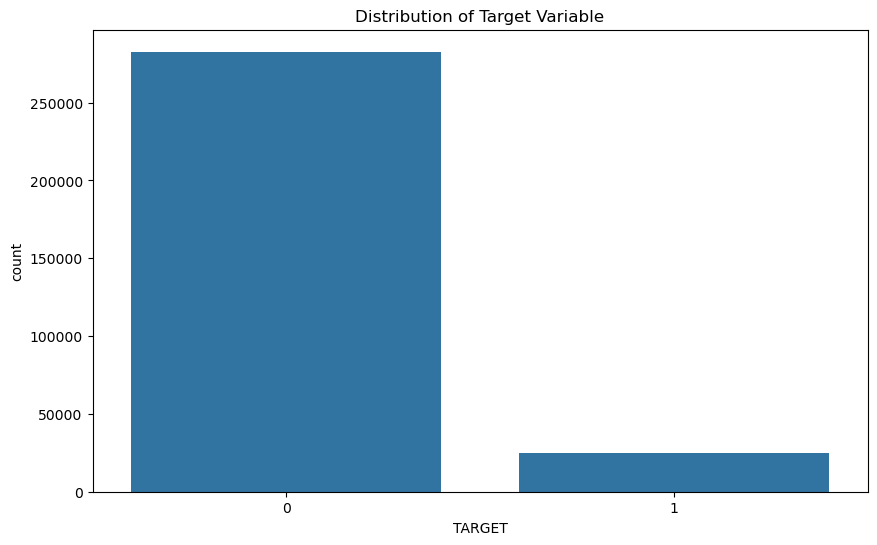


Target Distribution:
Non-default (0): 91.93%
Default (1): 8.07%


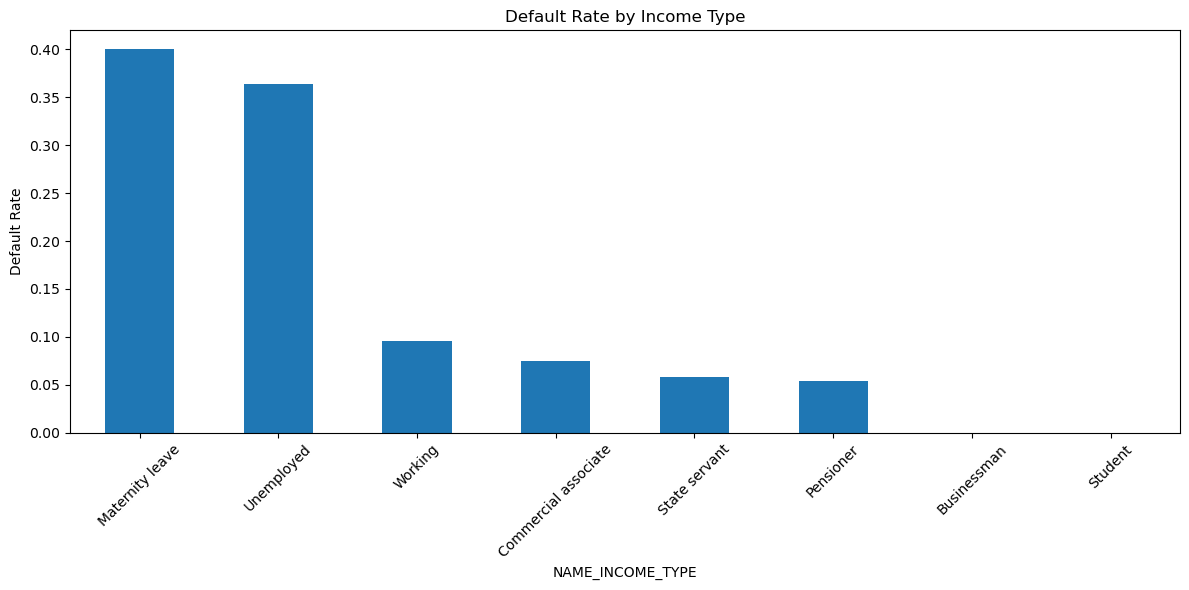


Customer Volume by Income Type:
NAME_INCOME_TYPE
Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: proportion, dtype: float64


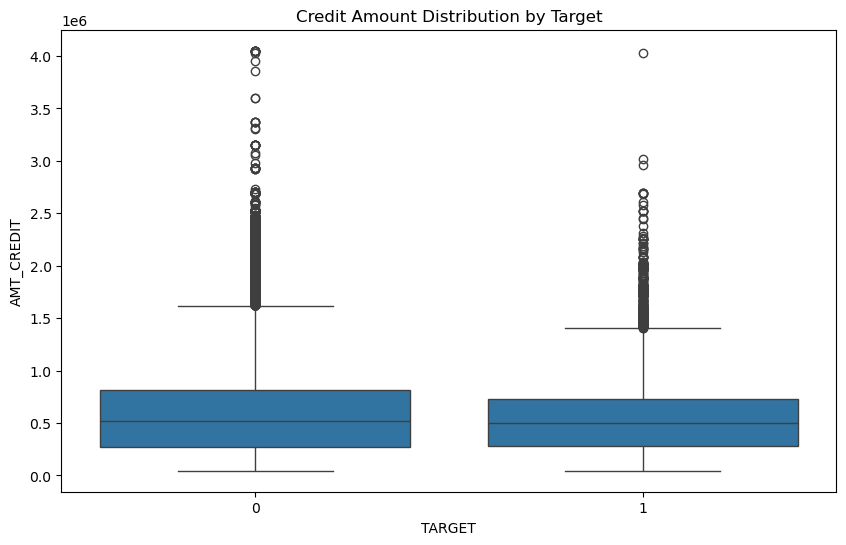


Credit Amount Statistics by Target:
           count           mean            std      min       25%       50%  \
TARGET                                                                        
0       282686.0  602648.282002  406845.907710  45000.0  270000.0  517788.0   
1        24825.0  557778.527674  346433.235646  45000.0  284400.0  497520.0   

             75%        max  
TARGET                       
0       810000.0  4050000.0  
1       733315.5  4027680.0  

2. Machine Learning Implementation

Validation AUC-ROC Score: 0.7113


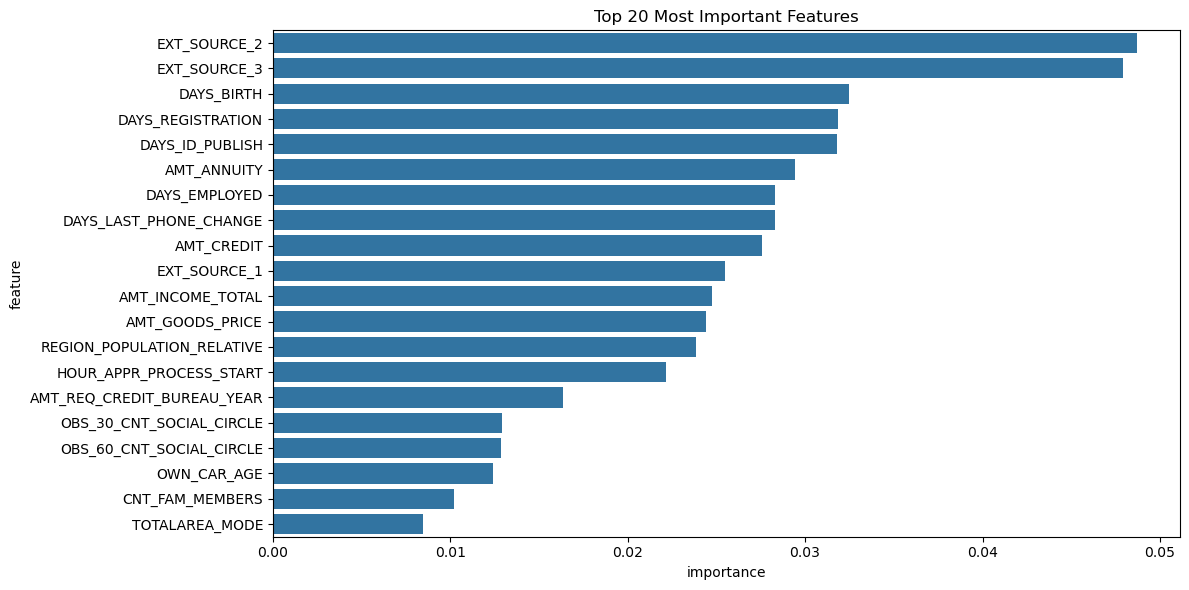


3. Business Recommendations

Business Recommendations based on Analysis:

1. Income Type Strategy:
                          mean   count
NAME_INCOME_TYPE                      
Maternity leave       0.400000       5
Unemployed            0.363636      22
Working               0.095885  158774
Commercial associate  0.074843   71617
State servant         0.057550   21703
Pensioner             0.053864   55362
Businessman           0.000000      10
Student               0.000000      18

2. Credit Amount Strategy:
                           mean  count
AMT_CREDIT                            
(44999.999, 254700.0]  0.072376  64925
(254700.0, 432000.0]   0.091724  58098
(432000.0, 604152.0]   0.100549  61552
(604152.0, 900000.0]   0.078549  64024
(900000.0, 4050000.0]  0.060752  58912

Key Recommendations:
1. Target Marketing Strategy:
   - Focus on low-risk income segments
   - Develop specialized products for each income category

2. Credit Amount Optimization:
   - Adjust credit limits b

In [17]:
# Main execution
if __name__ == "__main__":
    print("Starting Credit Risk Analysis...\n")
    
    print("1. Data Visualization and Business Insights")
    plot_target_distribution()
    analyze_income_type()
    analyze_credit_amount()
    
    print("\n2. Machine Learning Implementation")
    model, scaler = train_model()
    X, _ = prepare_model_data(train)
    analyze_feature_importance(model, scaler, X)
    
    print("\n3. Business Recommendations")
    generate_business_recommendations()